<a href="https://colab.research.google.com/github/GuiSSMartins/CSC-MMC-VisaoComputador/blob/main/CSC_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas de Deep Learning (Visão por Computador) no dataset CIFAR_10

## - MLP - Multi-Layer Percepton

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(2024)

In [ ]:
from tensorflow.keras.datasets import cifar10

Dar load no Dataset e Função de Visualização

In [ ]:
import tensorflow as tf

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Tamanho dos datatset de treino e de teste
print('Treino: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Teste: X=%s, y=%s' % (X_test.shape, y_test.shape))


170498071/170498071 [==============================] - 4s 0us/step
Treino: X=(50000, 32, 32, 3), y=(50000, 1)
Teste: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
# Convert RGB to grayscale
def rgb_to_gray(images):
    # Convert to float to avoid overflow or underflow losses
    images = images.astype(float)
    # Grayscale conversion formula: Y = 0.299R + 0.587G + 0.114B
    grayscale_images = np.dot(images, [0.299, 0.587, 0.114])
    return grayscale_images

X_train = rgb_to_gray(X_train)
X_test = rgb_to_gray(X_test)

In [ ]:
X_train.shape

(50000, 32, 32)

In [ ]:
X_train_array = X_train.reshape((50000, (32*32)))
X_test_array = X_test.reshape((10000, (32*32)))

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
X_train_array = X_train_array.astype('float32')
X_test_array = X_test_array.astype('float32')
X_train_array = X_train_array/255
X_test_array = X_test_array/255

In [ ]:
# Gráfico para visualizar a frequência de cada dígito (no dataset de treino)

# Obtenha os valores únicos e suas contagens
unique_values, counts = np.unique(y_train, return_counts=True)

# Crie uma tabela de frequências
print("Valor   Frequência")
print("------------------")
for value, count in zip(unique_values, counts):
    print(f"{value:5}   {count:10}")

Valor   Frequência
------------------
    0         5000
    1         5000
    2         5000
    3         5000
    4         5000
    5         5000
    6         5000
    7         5000
    8         5000
    9         5000


In [ ]:
# Gráfico para visualizar a frequência de cada dígito (no dataset de teste)


# Obtenha os valores únicos e suas contagens
unique_values, counts = np.unique(y_test, return_counts=True)

# Crie uma tabela de frequências
print("Valor   Frequência")
print("------------------")
for value, count in zip(unique_values, counts):
    print(f"{value:5}   {count:10}")

Valor   Frequência
------------------
    0         1000
    1         1000
    2         1000
    3         1000
    4         1000
    5         1000
    6         1000
    7         1000
    8         1000
    9         1000


Visualizar exemplos de imagens do Cifar_10

Tuning hiperparâmetros

In [ ]:
# Dicionário de hiperparâmetros
hiperparameters = {
    'learning_rate': [0.001, 0.01],
    'neurons': [128, 512],
    'activation': ['relu', 'softmax'],
    'epochs': [15, 30]
}

Criação MLP

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import time

def build_and_train_model(learning_rate, neurons, activation, epochs):
    model_MLP = tf.keras.Sequential([
        tf.keras.layers.Dense(neurons, activation=activation, input_shape=(1024,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model_MLP.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    inicio = time.time()
    history_MLP = model_MLP.fit(X_train_array, y_train, epochs=epochs, validation_split=0.1)
    fim = time.time()
    tempo_total = fim - inicio

    test_loss, test_acc = model_MLP.evaluate(X_test_array, y_test)

    return history_MLP, test_loss, test_acc, model_MLP, tempo_total

In [ ]:
from itertools import product
import math
import tensorflow as tf


all_results = []
best_model_MLP = [0,None,0,0]

i = 1
# Iterar sobre todas as combinações de hiperparâmetros
for learning_rate, neurons, activation, epochs in product(*hiperparameters.values()):
    print(f'*** Teste nº:{i} ***')
    print(f"Treinando modelo com learning_rate={learning_rate}, num_neurons={neurons}, funcao_de_ativacao={activation}, numero_de_epochs={epochs}")
    history_MLP, test_loss, test_acc, model_MLP, tempo_total = build_and_train_model(learning_rate, neurons, activation, epochs)
    print(f'Accuracy no conjunto de teste: {test_acc}')
    all_results.append([test_loss, test_acc, learning_rate, neurons, activation, epochs, tempo_total])

    if best_model_MLP[3] < test_acc:
        best_model_MLP = [i, history_MLP, test_loss, test_acc, model_MLP, learning_rate, neurons, activation, epochs, tempo_total]

    i = i+1


*** Teste nº:1 ***
Treinando modelo com learning_rate=0.001, num_neurons=128, funcao_de_ativacao=relu, numero_de_epochs=15
Epoch 1/15
1407/1407 [==============================] - 6s 4ms/step - loss: 2.0652 - accuracy: 0.2525 - val_loss: 2.0161 - val_accuracy: 0.2808
Epoch 2/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.9422 - accuracy: 0.3041 - val_loss: 1.9230 - val_accuracy: 0.3268
Epoch 3/15
1407/1407 [==============================] - 5s 3ms/step - loss: 1.8850 - accuracy: 0.3274 - val_loss: 1.8633 - val_accuracy: 0.3258
Epoch 4/15
1407/1407 [==============================] - 5s 3ms/step - loss: 1.8535 - accuracy: 0.3409 - val_loss: 1.8506 - val_accuracy: 0.3378
Epoch 5/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8287 - accuracy: 0.3493 - val_loss: 1.8313 - val_accuracy: 0.3520
Epoch 6/15
1407/1407 [==============================] - 5s 3ms/step - loss: 1.8085 - accuracy: 0.3576 - val_loss: 1.8136 - val_accuracy: 0.3510
Epoch 7/15
14

In [ ]:
best_model_MLP

[6,
 1.7218372821807861,
 0.39469999074935913,
 0.001,
 512,
 'relu',
 30,
 322.7502155303955]

In [ ]:
import os
import tensorflow as tf

# Ensure that 'modelos_guardados' directory exists
#os.makedirs('modelos_guardados', exist_ok=True)

# Save the model in the specified directory
model = best_model_MLP[4]
model.save('best_model_CIFAR10_MLP.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Guardar todos os resultados num csv
import csv
import os

csv_file_path = "resultados_cifar10/tuning_results_cifar10_MLP.csv"

# Create directory if it doesn't exist
os.makedirs(os.path.dirname(csv_file_path), exist_ok=True)

fieldnames = ["model_execution", "epochs", "learning_rate", "neurons", "activation_function", "test_loss", "accuracy", "tempo_execução"]

with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

    model_execution = 1
    for result in all_results:
        [test_loss, test_acc, learning_rate, neurons, activation, epochs, tempo] = result
        writer.writerow({
            "model_execution": model_execution,
            "epochs": epochs,
            "learning_rate": learning_rate,
            "neurons": neurons,
            "activation_function": activation,
            "test_loss": test_loss,
            "accuracy": test_acc,
            "tempo_execução": tempo
        })
        model_execution += 1

print("CSV file created successfully.")

CSV file created successfully.


Gráficos de evolução de treino do melhor modelo MLP

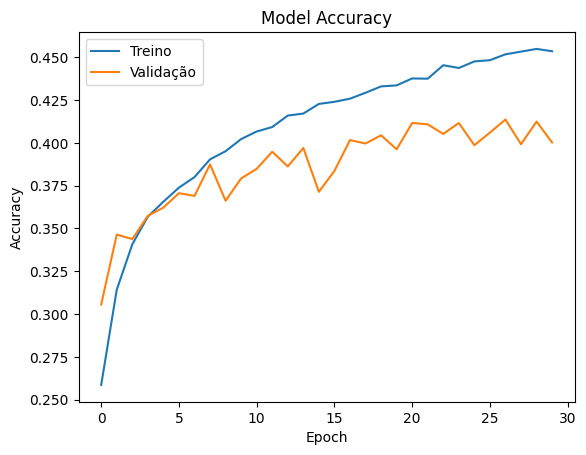

In [ ]:
import matplotlib.pyplot as plt

history_MLP = best_model_MLP[1]

# Plotting accuracy
plt.plot(history_MLP.history['accuracy'])
plt.plot(history_MLP.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

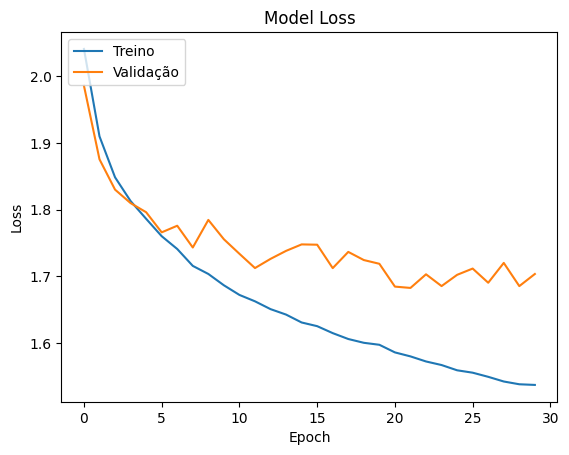

In [ ]:
# Gráfico evolução Loss
plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

model_MLP = best_model_MLP[4]

y_pred_fc = np.argmax(model_MLP.predict(X_test_array), axis=1)

# confusion matrix
cm_fc = confusion_matrix(y_true=y_test, y_pred=y_pred_fc)

313/313 [==============================] - 1s 2ms/step


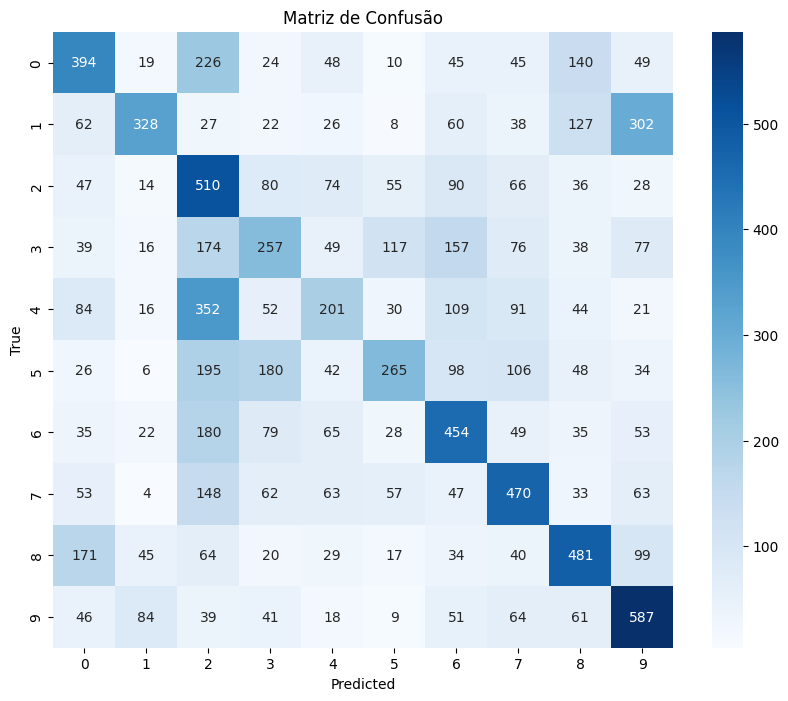

In [ ]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()